In [20]:
import sqlite3

from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
conn = sqlite3.connect('/Users/ole/Downloads/global_road_edges.db')
cursor = conn.cursor()

In [11]:
# Print column names
cursor.execute('PRAGMA table_info(road_edges)')
for row in cursor.fetchall():
    print(row)

(0, 'u', '', 0, None, 0)
(1, 'v', '', 0, None, 0)
(2, 'key', '', 0, None, 0)
(3, 'edge_id', '', 0, None, 0)
(4, 'highway', '', 0, None, 0)
(5, 'length', '', 0, None, 0)
(6, 'type_category', '', 0, None, 0)
(7, 'next_segment', '', 0, None, 0)
(8, 'previous_segment', '', 0, None, 0)
(9, 'forward_angle', '', 0, None, 0)
(10, 'forward_angle_abs', '', 0, None, 0)
(11, 'speed_kph', '', 0, None, 0)
(12, 'travel_time', '', 0, None, 0)
(13, 'stretch_linearity', '', 0, None, 0)
(14, 'major_section_id', '', 0, None, 0)
(15, 'section_id', '', 0, None, 0)
(16, 'bearing', '', 0, None, 0)
(17, 'continuity', '', 0, None, 0)
(18, 'distance_to_last_intersection', '', 0, None, 0)
(19, 'distance_to_last_major_intersection', '', 0, None, 0)
(20, 'next_node_degree', '', 0, None, 0)
(21, 'next_node_major_degree', '', 0, None, 0)
(22, 'intersection_left_angle', '', 0, None, 0)
(23, 'bridge', '', 0, None, 0)
(24, 'junction', '', 0, None, 0)
(25, 'width', '', 0, None, 0)
(26, 'tunnel', '', 0, None, 0)
(27, 'rig

In [12]:
cursor.execute('SELECT COUNT(DISTINCT cluster_street_gmm13) FROM road_edges')
for row in cursor.fetchall():
    print(row)

(13,)


In [14]:
import pandas as pd

# Load data into a DataFrame
query = "SELECT * FROM road_edges;"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [16]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_numerical.describe()
df_nb = df_numerical[""]

,u,v,key,edge_id,length,forward_angle,forward_angle_abs,speed_kph,travel_time,stretch_linearity,...,right_neighbour_angle_deviation::nb::weighted_mean,right_neighbour_distance::nb::weighted_mean,forward_angle_abs::nb::weighted_mean,section_length::nb::weighted_mean,angle_entropy::nb,bearing_cardinality::nb,dead_end_sections::nb::weighted_percentage,continuity::nb::weighted_median,stretch_curvilinearity::nb::weighted_mean,continuity::nb::weighted_mean
count,4.500000e+05,4.500000e+05,450000.000000,4.500000e+05,450000.000000,407223.000000,4.072230e+05,450000.000000,450000.000000,450000.000000,...,449759.000000,449982.000000,448895.000000,449982.000000,449982.000000,449982.000000,449982.000000,449982.000000,449982.000000,449982.000000
mean,5.641984e+09,5.637393e+09,0.000029,8.691373e+05,27.900164,-0.022885,1.290704e+01,37.330733,3.232185,0.453007,...,18.326470,95.535104,11.190130,233.708543,3.608296,0.090942,0.083411,0.386057,0.497740,0.395727
std,3.613307e+09,3.612946e+09,0.005375,1.100482e+06,41.165511,22.688281,1.865922e+01,16.069275,5.224654,0.291750,...,9.872115,60.934826,9.306198,401.397470,0.984921,0.111535,0.178936,0.320701,0.191944,0.266938
min,1.019700e+05,1.074430e+05,0.000000,2.000000e+00,0.011000,-177.623180,1.124931e-10,10.000000,0.000000,0.000000,...,0.004588,0.000000,0.000006,1.572849,0.000000,0.000000,0.000000,0.001943,0.000000,0.002560
25%,2.140003e+09,2.140459e+09,0.000000,1.619898e+05,6.563000,-6.081590,1.348167e+00,20.000000,0.600000,0.224029,...,10.818765,49.465414,5.426419,78.860619,2.936384,0.027778,0.000000,0.135952,0.368340,0.182940
50%,5.849395e+09,5.837353e+09,0.000000,4.296060e+05,14.381000,-0.000097,6.148062e+00,30.000000,1.500000,0.392759,...,18.156881,80.810660,9.032931,130.206881,3.732947,0.061983,0.000000,0.264751,0.517858,0.338497
75%,8.674917e+09,8.661981e+09,0.000000,1.124048e+06,33.513000,6.220217,1.675555e+01,50.000000,3.800000,0.622041,...,25.398605,127.769364,14.140537,239.368922,4.418385,0.103448,0.084134,0.555751,0.641894,0.556037
max,1.207182e+10,1.207182e+10,1.000000,6.507944e+06,3188.472000,179.182664,1.791827e+02,110.000000,335.200000,1.000000,...,89.509109,300.000000,169.378051,21450.566376,5.114254,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
corr_matrix = df_numerical.corr()

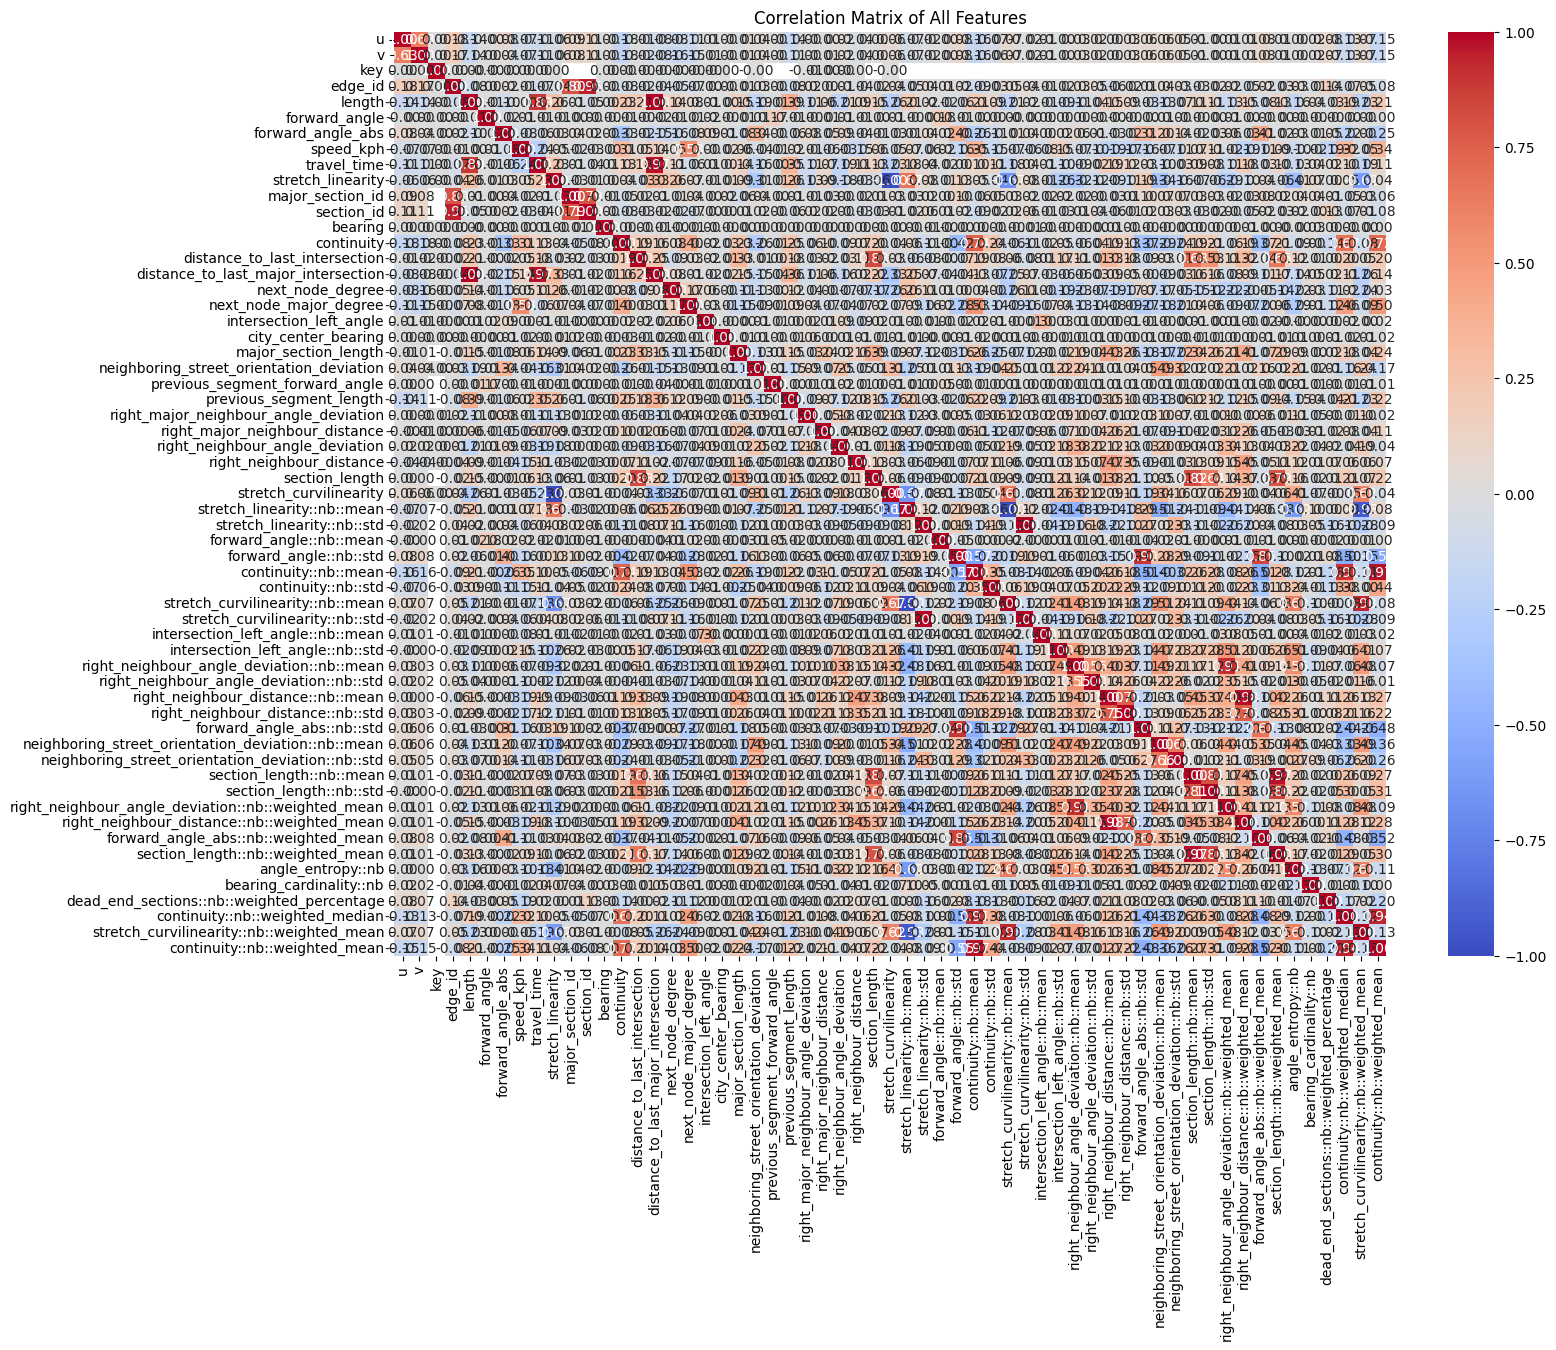

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of All Features")
plt.show()


In [27]:
import re

# Group by 'cluster_street_gmm13', calculate descriptive statistics, and transpose the DataFrame
groupby = df.groupby('cluster_street_gmm13')
grouped_stats = groupby.describe().T

# Function to extract numeric values for natural sorting
def natural_key(column_name):
    # Split into numeric parts and convert to integer if possible
    return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', str(column_name))]

# Sort columns using natural order
sorted_grouped_stats = grouped_stats.reindex(sorted(grouped_stats.columns, key=natural_key), axis=1)

sorted_grouped_stats

cluster_street_gmm13                            0             1             2  \
u                             count  3.047100e+04  2.412600e+04  2.874800e+04   
                              mean   4.872359e+09  5.597881e+09  5.039299e+09   
                              std    3.336898e+09  3.619549e+09  3.557806e+09   
                              min    2.246800e+05  1.340780e+05  1.070210e+05   
                              25%    1.768165e+09  1.927763e+09  1.710602e+09   
...                                           ...           ...           ...   
continuity::nb::weighted_mean min    9.729651e-02  1.158576e-01  1.941005e-02   
                              25%    3.258582e-01  3.865633e-01  2.319278e-01   
                              50%    4.019703e-01  4.836200e-01  3.071690e-01   
                              75%    4.783970e-01  5.754024e-01  3.894036e-01   
                              max    7.385157e-01  9.694680e-01  6.848837e-01   

cluster_street_gmm13                            3             4             5  \
u                             count  1.990100e+04  2.800000e+01  3.094600e+04   
                              mean   5.405666e+09  5.671718e+09  5.507492e+09   
                              std    3.641486e+09  2.958790e+09  3.506614e+09   
                              min    6.852500e+05  1.274745e+09  1.247130e+05   
                              25%    1.704549e+09  3.620547e+09  2.217044e+09   
...                                           ...           ...           ...   
continuity::nb::weighted_mean min    5.091717e-01  6.604075e-01  4.384004e-03   
                              25%    7.121264e-01  7.590064e-01  1.048090e-01   
                              50%    7.869064e-01  9.117250e-01  1.665148e-01   
                              75%    8.629519e-01  9.259565e-01  2.354265e-01   
                              max    1.000000e+00  9.933388e-01  5.647112e-01   

cluster_street_gmm13                            6             7             8  \
u                             count  4.286400e+04  1.830000e+04  4.069000e+03   
                              mean   6.387382e+09  4.811128e+09  5.263291e+09   
                              std    3.382537e+09  3.643431e+09  3.348510e+09   
                              min    1.968270e+05  1.808680e+05  1.399427e+07   
                              25%    3.821630e+09  1.280452e+09  1.947223e+09   
...                                           ...           ...           ...   
continuity::nb::weighted_mean min    2.834000e-03  8.367003e-02  1.293359e-01   
                              25%    8.746692e-02  4.768781e-01  3.278972e-01   
                              50%    1.499397e-01  5.851043e-01  4.366070e-01   
                              75%    2.315544e-01  6.653731e-01  5.453491e-01   
                              max    5.795385e-01  9.939860e-01  8.890098e-01   

cluster_street_gmm13                            9            10            11  \
u                             count  6.000000e+00  3.665100e+04  1.397500e+04   
                              mean   5.066574e+09  5.917793e+09  6.282626e+09   
                              std    3.440492e+09  3.322964e+09  3.427503e+09   
                              min    2.444908e+09  2.984500e+05  2.224450e+05   
                              25%    2.444912e+09  3.210081e+09  3.274679e+09   
...                                           ...           ...           ...   
continuity::nb::weighted_mean min    2.003822e-01  6.795516e-03  5.669217e-03   
                              25%    3.427095e-01  3.402941e-01  1.528305e-01   
                              50%    5.965593e-01  4.450276e-01  2.118027e-01   
                              75%    7.145533e-01  5.580176e-01  2.924642e-01   
                              max    7.145533e-01  1.000000e+00  6.172550e-01   

cluster_street_gmm13                           12  
u                             count  1.281500e+04  
    

In [32]:
from scipy.stats import f_oneway


# Function to perform ANOVA for each numeric feature in the DataFrame
def calculate_anova(dataframe, group_column, min_samples=2):
    significant_features = {}
    numeric_columns = dataframe.select_dtypes(include='number').columns

    for col in numeric_columns:
        # Skip the group column itself
        if col == group_column:
            continue
        # Group the feature by cluster and extract values for ANOVA
        groups = [dataframe[dataframe[group_column] == cluster][col].dropna() for cluster in dataframe[group_column].unique()]
        
        # Filter out groups with fewer than min_samples
        valid_groups = [group for group in groups if len(group) >= min_samples]

        # Ensure there are at least two groups with sufficient samples to run ANOVA
        if len(valid_groups) < 2:
            continue

        # Perform ANOVA
        stat, p_value = f_oneway(*valid_groups)
        
        # Check if the feature has a significant difference (p-value < 0.05)
        if p_value < 0.05:
            significant_features[col] = {'F-statistic': stat, 'p-value': p_value}

    # Return significant features as a DataFrame
    return pd.DataFrame.from_dict(significant_features, orient='index')

# Calculate ANOVA for all numeric features grouped by 'cluster_street_gmm13'
anova_results = calculate_anova(df, 'cluster_street_gmm13')

# Calculate ANOVA for all numeric features grouped by 'cluster_street_gmm13'
anova_results = calculate_anova(df, 'cluster_street_gmm13')

anova_results

/Users/ole/Library/Caches/pypoetry/virtualenvs/citypy-4hP0Kyji-py3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/Users/ole/Library/Caches/pypoetry/virtualenvs/citypy-4hP0Kyji-py3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,F-statistic,p-value
u,529.399588,0.000000e+00
v,529.204715,0.000000e+00
edge_id,135.854328,0.000000e+00
length,1103.187683,0.000000e+00
forward_angle,2.059280,1.625548e-02
forward_angle_abs,615.197415,0.000000e+00
speed_kph,1734.749121,0.000000e+00
travel_time,833.158470,0.000000e+00
stretch_linearity,2761.866785,0.000000e+00
section_id,119.714583,1.243095e-299


In [30]:
anova_results

""


/var/folders/5m/zp7k7dg54nj636lnx4sg6r8m0000gn/T/ipykernel_30853/2641021838.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_scaled.groupby('cluster_street_gmm13')


<Figure size 2000x1000 with 0 Axes>

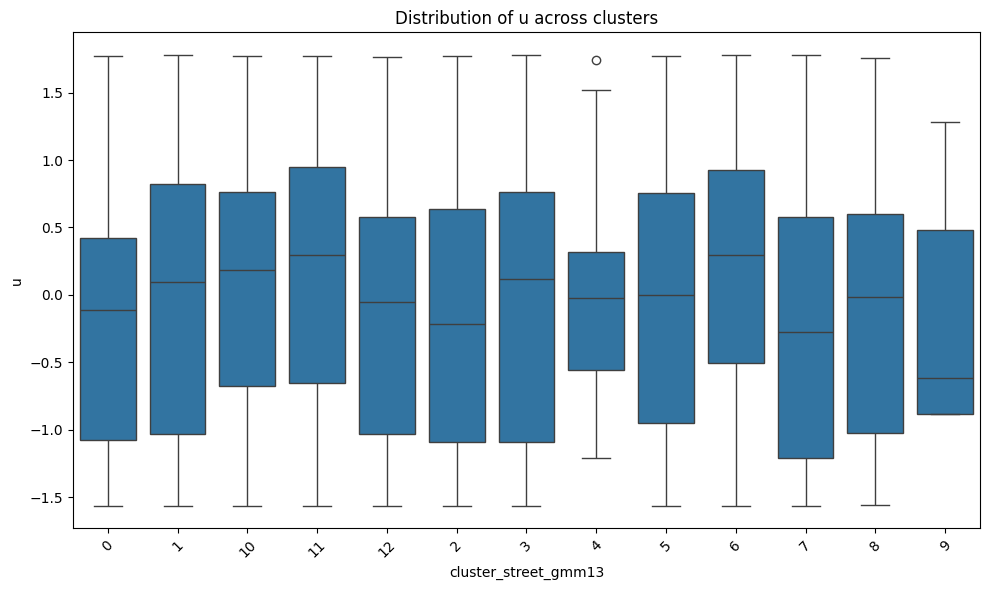

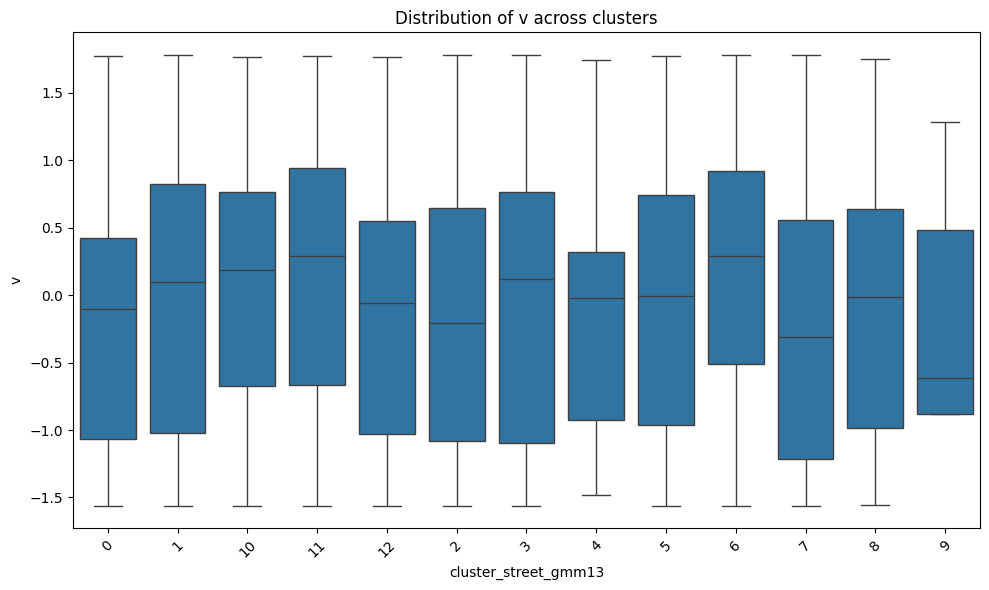

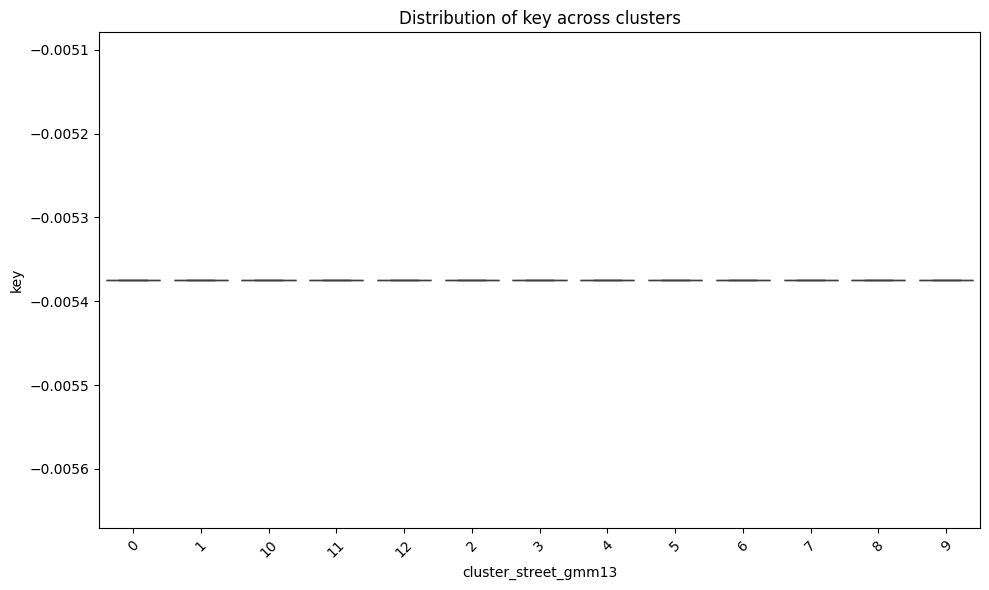

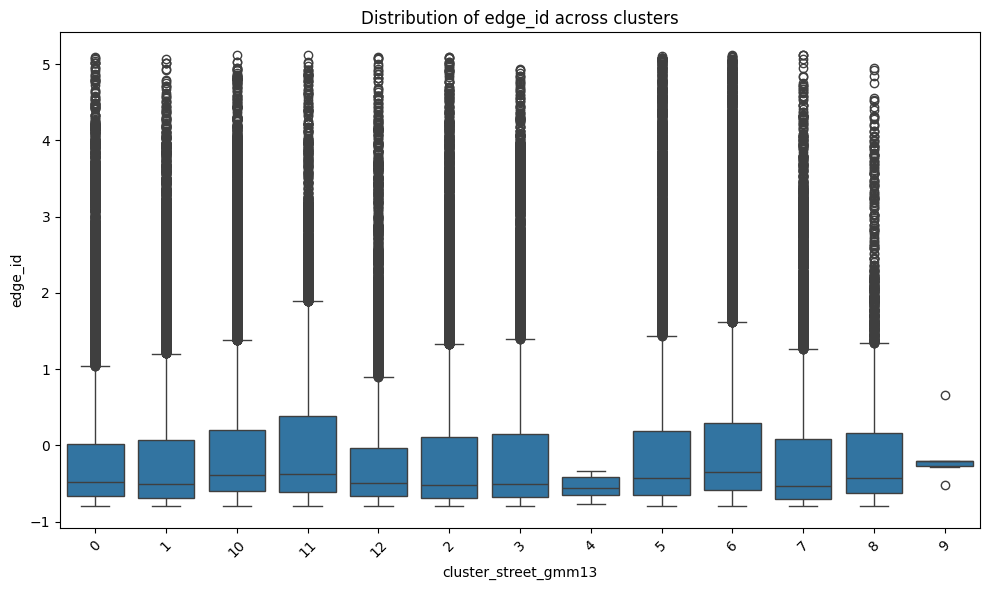

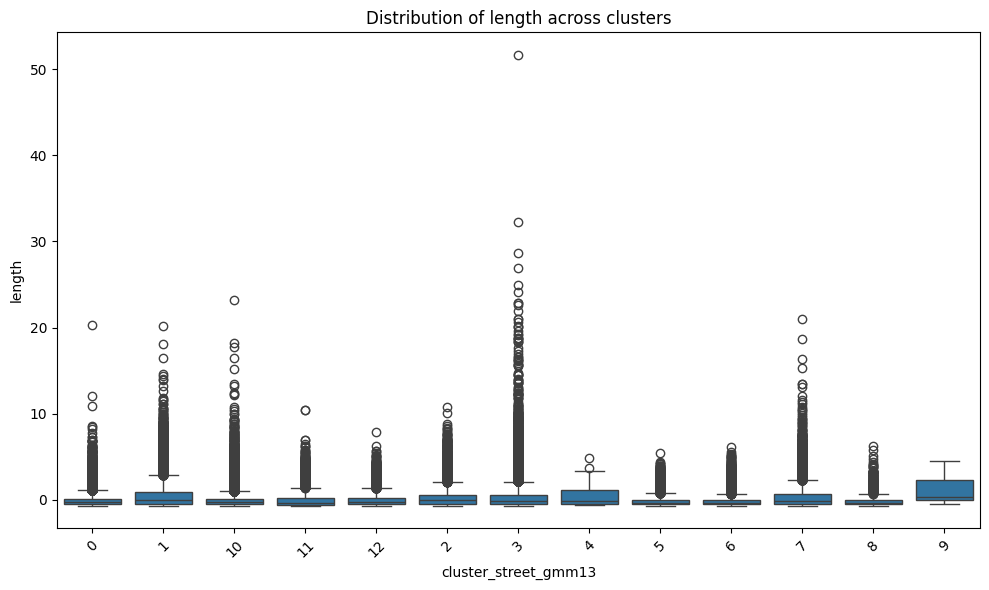

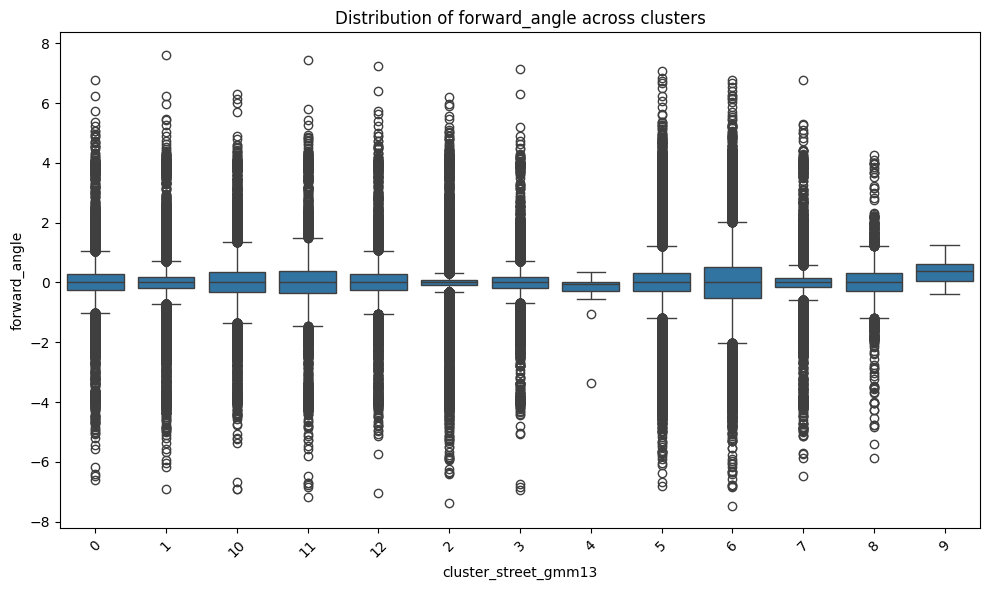

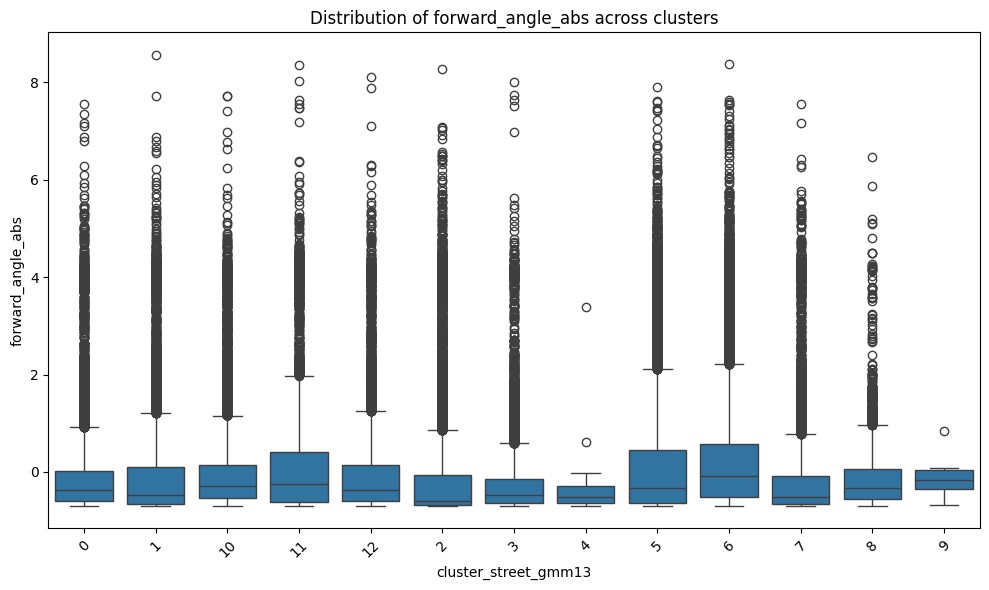

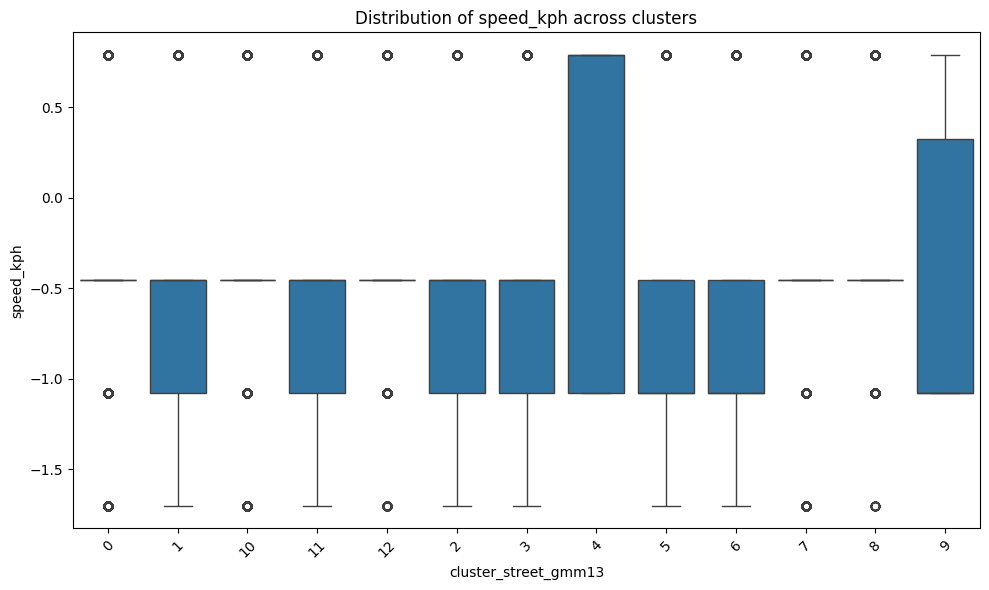

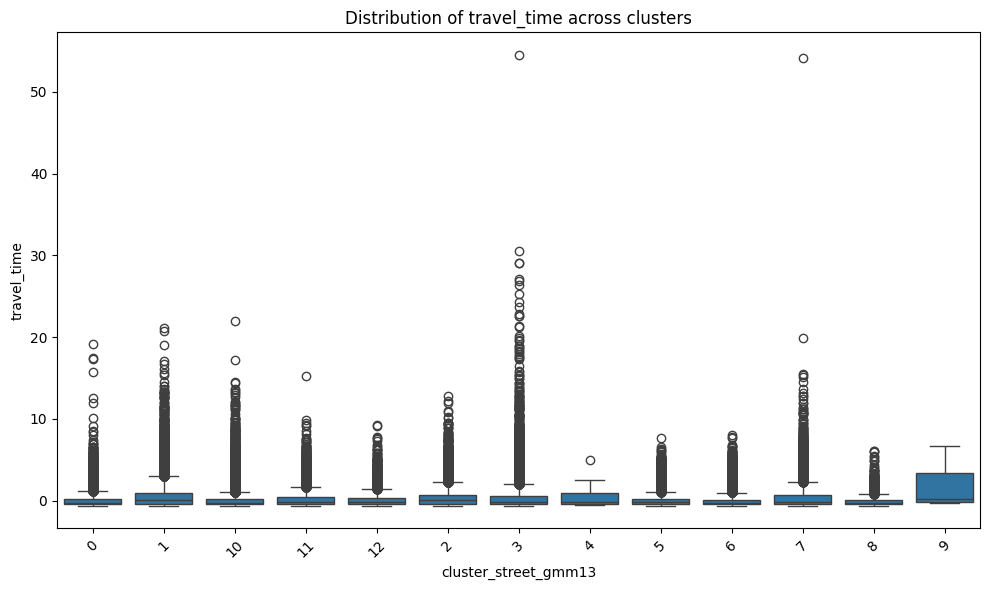

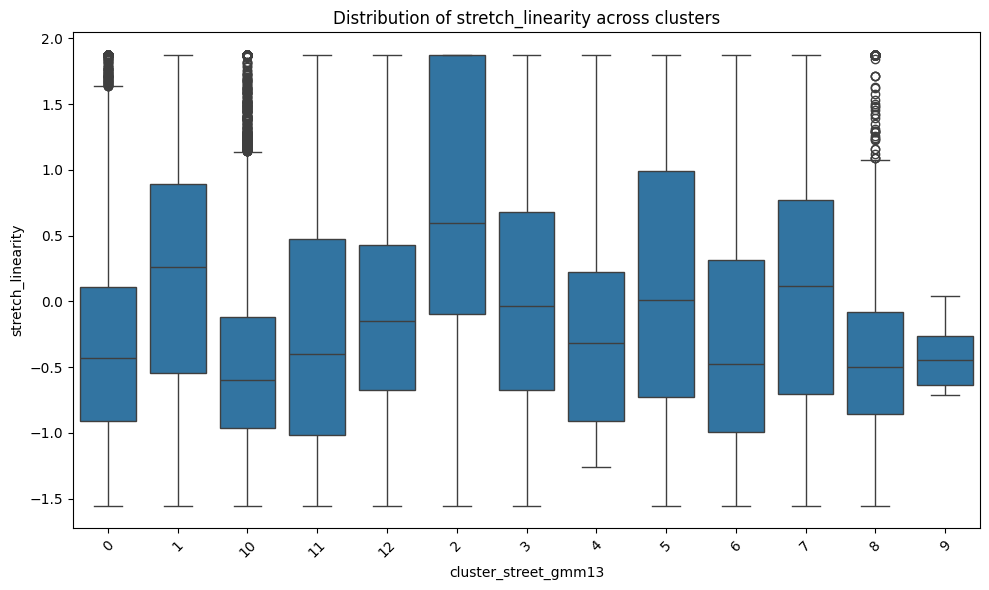

ValueError: List of boxplot statistics and `positions` values must have same the length

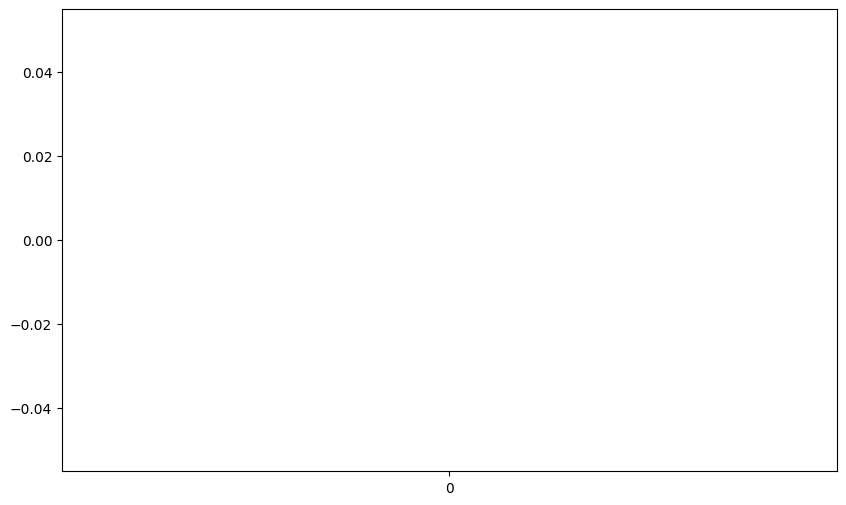

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
# Assuming your SQLite database is named 'your_database.db' and the table is 'your_table'
import sqlite3

conn = sqlite3.connect('/Users/ole/Downloads/global_road_edges.db')
query = "SELECT * FROM road_edges"
df = pd.read_sql_query(query, conn)
conn.close()

# Ensure 'cluster_street_gmm13' is treated as a category
df['cluster_street_gmm13'] = df['cluster_street_gmm13'].astype('category')

# Prepare the data
# Separate the cluster column and numeric columns
cluster_column = df['cluster_street_gmm13']
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Add the cluster column back to the scaled dataframe
df_scaled['cluster_street_gmm13'] = cluster_column

# Group by cluster
grouped = df_scaled.groupby('cluster_street_gmm13')

# Exploratory Data Analysis
# Summary statistics for each cluster
summary_stats = grouped.describe()

# Visualizations
# Box plots for each feature across clusters
plt.figure(figsize=(20, 10))
for column in df_scaled.columns:
    if column != 'cluster_street_gmm13':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster_street_gmm13', y=column, data=df_scaled)
        plt.title(f'Distribution of {column} across clusters')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_scaled.drop('cluster_street_gmm13', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Statistical tests
# ANOVA test for each feature
anova_results = {}
for column in df_scaled.columns:
    if column != 'cluster_street_gmm13':
        groups = [group for name, group in df_scaled.groupby('cluster_street_gmm13')[column]]
        f_value, p_value = stats.f_oneway(*groups)
        anova_results[column] = {'F-value': f_value, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:")
print(anova_df)

# Principal Component Analysis
pca = PCA()
pca_result = pca.fit_transform(df_scaled.drop('cluster_street_gmm13', axis=1))

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

# Visualize the first two principal components, colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['cluster_street_gmm13'].cat.codes, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components by Cluster')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': df_scaled.drop('cluster_street_gmm13', axis=1).columns,
    'importance': np.abs(pca.components_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features by Importance (Based on First Principal Component)')
plt.show()

In [38]:
df.groupby('cluster_street_gmm13').agg({col: ['mean', 'std'] for col in df.select_dtypes(include='float').columns}).T

/var/folders/5m/zp7k7dg54nj636lnx4sg6r8m0000gn/T/ipykernel_30853/2123465457.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster_street_gmm13').agg({col: ['mean', 'std'] for col in df.select_dtypes(include='float').columns}).T


cluster_street_gmm13                                        0             1  \
edge_id                                   mean  726762.815300  7.637513e+05   
                                          std   971390.984787  1.031708e+06   
length                                    mean      26.037151  4.660673e+01   
                                          std       30.913431  5.718718e+01   
forward_angle                             mean       0.147037 -4.404672e-01   
...                                                       ...           ...   
continuity::nb::weighted_median           std        0.103941  1.816923e-01   
stretch_curvilinearity::nb::weighted_mean mean       0.579440  3.828801e-01   
                                          std        0.127875  1.339971e-01   
continuity::nb::weighted_mean             mean       0.402608  4.823860e-01   
                                          std        0.105092  1.345914e-01   

cluster_street_gmm13                                      10            11  \
edge_id                                   mean  8.580761e+05  9.415111e+05   
                                          std   1.034000e+06  1.109131e+06   
length                                    mean  2.740509e+01  2.763674e+01   
                                          std   3.681641e+01  3.471087e+01   
forward_angle                             mean -3.237749e-03 -1.222177e-01   
...                                                      ...           ...   
continuity::nb::weighted_median           std   2.013775e-01  5.366544e-02   
stretch_curvilinearity::nb::weighted_mean mean  6.329024e-01  5.473714e-01   
                                          std   1.223135e-01  1.776033e-01   
continuity::nb::weighted_mean             mean  4.524403e-01  2.287780e-01   
                                          std   1.479361e-01  1.053901e-01   

cluster_street_gmm13                                      12             2  \
edge_id                                   mean  7.224413e+05  7.672387e+05   
                                          std   1.006545e+06  1.054824e+06   
length                                    mean  2.821915e+01  3.789222e+01   
                                          std   2.995188e+01  3.915709e+01   
forward_angle                             mean -2.426235e-02 -1.301386e-01   
...                                                      ...           ...   
continuity::nb::weighted_median           std   4.487965e-02  9.107782e-02   
stretch_curvilinearity::nb::weighted_mean mean  4.854899e-01  3.125677e-01   
                                          std   8.658888e-02  1.214684e-01   
continuity::nb::weighted_mean             mean  3.032304e-01  3.133319e-01   
                                          std   8.985372e-02  1.093420e-01   

cluster_street_gmm13                                       3              4  \
edge_id                                   mean  8.836362e+05  289293.785714   
                                          std   1.240126e+06  147043.073261   
length                                    mean  4.407592e+01      53.858143   
                                          std   7.195213e+01      62.538431   
forward_angle                             mean -3.856886e-02      -5.401412   
...                                                      ...            ...   
continuity::nb::weighted_median           std   1.381019e-04       0.000000   
stretch_curvilinearity::nb::weighted_mean mean  4.302219e-01       0.405259   
                                          std   1.870084e-01       0.232464   
continuity::nb::weighted_mean             mean  7.886323e-01       0.850902   
                                          std   1.060048e-01       0.102056   

cluster_street_gmm13                                       5             6  \
edge_id                                   mean  8.791087e+05  9.624209e+05   
                                          std   1.166313e+06  1.164489e+